In [19]:
import os
import cv2
from tensorflow.keras.callbacks import TensorBoard
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from IPython.display import display, Image
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [3]:

# Function to load and preprocess images
def load_and_preprocess_data(data_dir, image_size):
    images = []
    labels = []

    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            for file_name in os.listdir(class_path):
                file_path = os.path.join(class_path, file_name)
                image = cv2.imread(file_path)
                image = cv2.resize(image, (image_size, image_size))
                images.append(image)
                labels.append(class_name)

    # Convert images and labels to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)

    # Convert labels to numerical format
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    labels = to_categorical(labels)

    return images, labels, label_encoder

In [6]:
train_dir = './augmented_data/train'
test_dir =  './augmented_data/validation'

# Define the image size 
image_size = 128

# Load and preprocess training data
X_train, y_train, label_encoder = load_and_preprocess_data(train_dir, image_size)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Load and preprocess testing data
X_test, y_test, label_encoder_test = load_and_preprocess_data(test_dir, image_size) 

random images from the training dataset


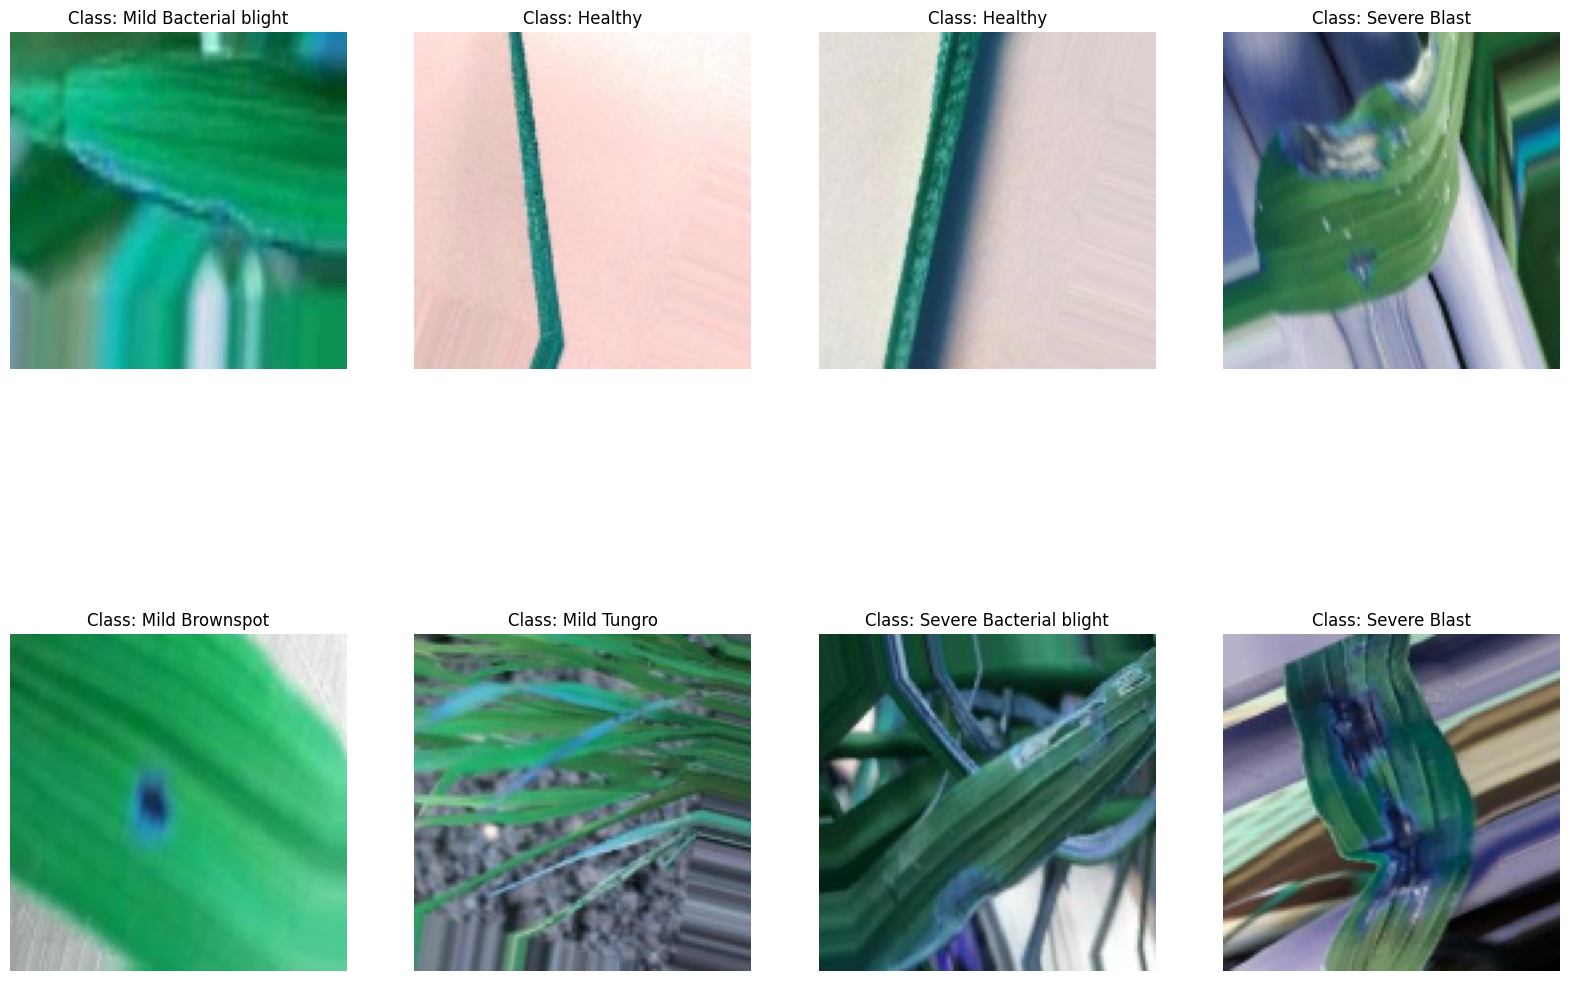

random images from the testing dataset


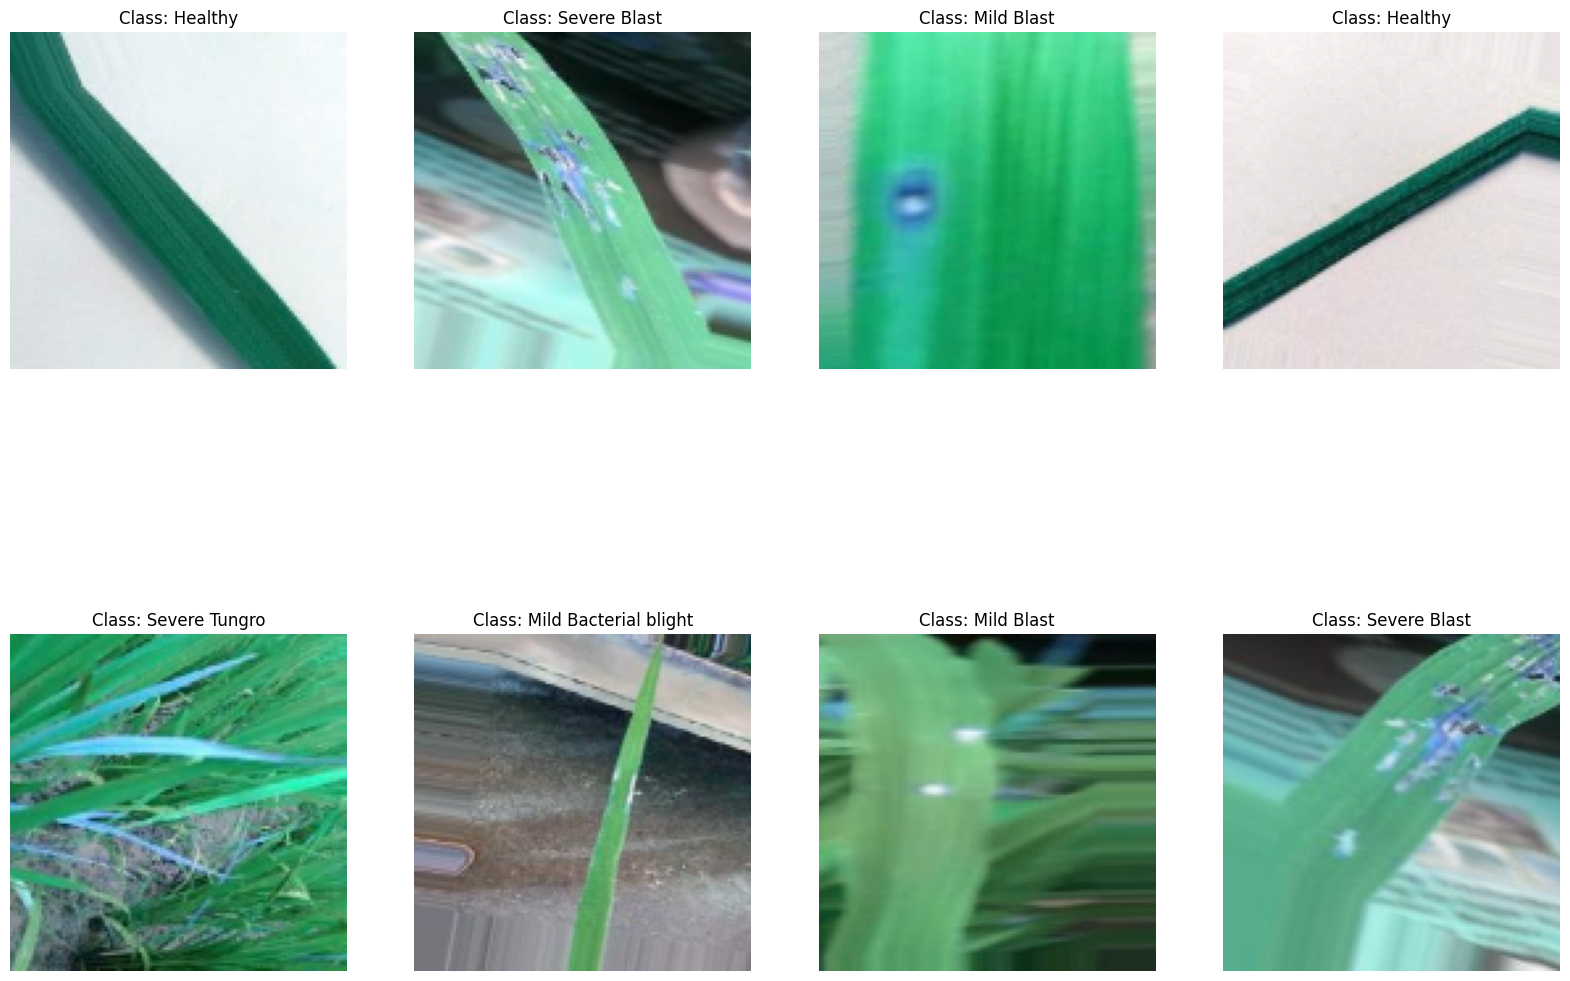

In [12]:

# Function to display randomly selected images using matplotlib
def display_random_images(images, labels, class_names, label_encoder, num_images=8):
 
    num_images_per_row =4
    num_rows = 2 
    indices = np.random.choice(len(images), num_images_per_row * num_rows, replace=False)
    class_names = label_encoder.classes_
    plt.figure(figsize=(20, 15))

    for i, idx in enumerate(indices):
        plt.subplot(num_rows, num_images_per_row, i % (num_images_per_row * num_rows) + 1)
        plt.imshow(images[idx].astype(np.uint8))
        plt.title(f"Class: {class_names[labels[idx].argmax()]}")
        if (i + 1) % num_images_per_row == 0:
            plt.subplots_adjust(hspace=0.09)
        plt.axis('off')

    plt.show()

# Display random images from the training dataset
print("random images from the training dataset")
display_random_images(X_train, y_train, label_encoder.classes_, label_encoder)

# Display random images from the testing dataset
print("random images from the testing dataset")
display_random_images(X_test, y_test, label_encoder.classes_, label_encoder)

In [20]:
# Load pre-trained VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Extract features using VGG16 for training data
X_train_features = vgg_model.predict(X_train)
X_val_features = vgg_model.predict(X_val)
X_test_features = vgg_model.predict(X_test)

# Flatten the features
X_train_flatten = X_train_features.reshape(X_train_features.shape[0], -1)
X_val_flatten = X_val_features.reshape(X_val_features.shape[0], -1)
X_test_flatten = X_test_features.reshape(X_test_features.shape[0], -1)

# Build a model with four hidden layers
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train_flatten.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(9, activation='softmax'))  # 9 classes


56/56 [==============================] - 80s 1s/step


# using adam optimizer with learning rate 0.001 , loss function = categorial cross entropy 

In [21]:
# Compile the model

#using adam optimizer with learning rate 0.001 , loss function = categorial cross entropy 
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)
# Train the model
history0=model.fit(X_train_flatten, y_train, epochs=10, validation_data=(X_val_flatten, y_val))

#save model in model.h5
model.save('model.h5')

Epoch 1/10
607/607 [==============================] - 10s 14ms/step - loss: 0.6381 - accuracy: 0.7969 - val_loss: 0.3846 - val_accuracy: 0.8686
Epoch 2/10
607/607 [==============================] - 9s 14ms/step - loss: 0.2324 - accuracy: 0.9152 - val_loss: 0.3015 - val_accuracy: 0.8954
Epoch 3/10
607/607 [==============================] - 9s 14ms/step - loss: 0.1510 - accuracy: 0.9443 - val_loss: 0.3210 - val_accuracy: 0.8933
Epoch 4/10
607/607 [==============================] - 9s 15ms/step - loss: 0.1228 - accuracy: 0.9571 - val_loss: 0.3286 - val_accuracy: 0.8985
Epoch 5/10
607/607 [==============================] - 9s 15ms/step - loss: 0.0981 - accuracy: 0.9666 - val_loss: 0.4427 - val_accuracy: 0.8865
Epoch 6/10
607/607 [==============================] - 9s 15ms/step - loss: 0.0975 - accuracy: 0.9686 - val_loss: 0.3909 - val_accuracy: 0.9048
Epoch 7/10
607/607 [==============================] - 9s 15ms/step - loss: 0.0800 - accuracy: 0.9757 - val_loss: 0.4516 - val_accuracy: 0.886

# using adam optimizer with learning rate 0.002 , loss function = categorial cross entropy 

In [22]:
model.compile(optimizer=Adam(learning_rate=0.002), loss='categorical_crossentropy', metrics=['accuracy'])

tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)
# Train the model
history1=model.fit(X_train_flatten, y_train, epochs=10, validation_data=(X_val_flatten, y_val))


Epoch 1/10
607/607 [==============================] - 10s 15ms/step - loss: 0.1620 - accuracy: 0.9536 - val_loss: 0.4150 - val_accuracy: 0.8832
Epoch 2/10
607/607 [==============================] - 8s 14ms/step - loss: 0.1329 - accuracy: 0.9636 - val_loss: 0.4074 - val_accuracy: 0.8970
Epoch 3/10
607/607 [==============================] - 8s 13ms/step - loss: 0.0794 - accuracy: 0.9768 - val_loss: 0.4163 - val_accuracy: 0.9069
Epoch 4/10
607/607 [==============================] - 9s 14ms/step - loss: 0.0854 - accuracy: 0.9778 - val_loss: 0.4325 - val_accuracy: 0.9071
Epoch 5/10
607/607 [==============================] - 9s 14ms/step - loss: 0.0743 - accuracy: 0.9807 - val_loss: 0.4502 - val_accuracy: 0.9077
Epoch 6/10
607/607 [==============================] - 9s 14ms/step - loss: 0.0718 - accuracy: 0.9817 - val_loss: 0.4142 - val_accuracy: 0.9135
Epoch 7/10
607/607 [==============================] - 9s 14ms/step - loss: 0.0488 - accuracy: 0.9862 - val_loss: 0.3995 - val_accuracy: 0.905

# using adam optimizer with learning rate 0.0025 , loss function = categorial cross entropy 

In [23]:
model.compile(optimizer=Adam(learning_rate=0.0025), loss='categorical_crossentropy', metrics=['accuracy'])

tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)
# Train the model
history2=model.fit(X_train_flatten, y_train, epochs=10, validation_data=(X_val_flatten, y_val))

Epoch 1/10
607/607 [==============================] - 10s 14ms/step - loss: 0.1331 - accuracy: 0.9756 - val_loss: 0.6015 - val_accuracy: 0.9065
Epoch 2/10
607/607 [==============================] - 9s 15ms/step - loss: 0.0904 - accuracy: 0.9805 - val_loss: 0.5666 - val_accuracy: 0.9042
Epoch 3/10
607/607 [==============================] - 9s 15ms/step - loss: 0.0510 - accuracy: 0.9881 - val_loss: 0.5823 - val_accuracy: 0.9123
Epoch 4/10
607/607 [==============================] - 9s 14ms/step - loss: 0.1153 - accuracy: 0.9826 - val_loss: 0.4402 - val_accuracy: 0.9098
Epoch 5/10
607/607 [==============================] - 9s 15ms/step - loss: 0.0502 - accuracy: 0.9887 - val_loss: 0.6865 - val_accuracy: 0.9069
Epoch 6/10
607/607 [==============================] - 9s 15ms/step - loss: 0.0574 - accuracy: 0.9881 - val_loss: 0.6478 - val_accuracy: 0.8968
Epoch 7/10
607/607 [==============================] - 9s 15ms/step - loss: 0.0596 - accuracy: 0.9870 - val_loss: 0.5470 - val_accuracy: 0.914

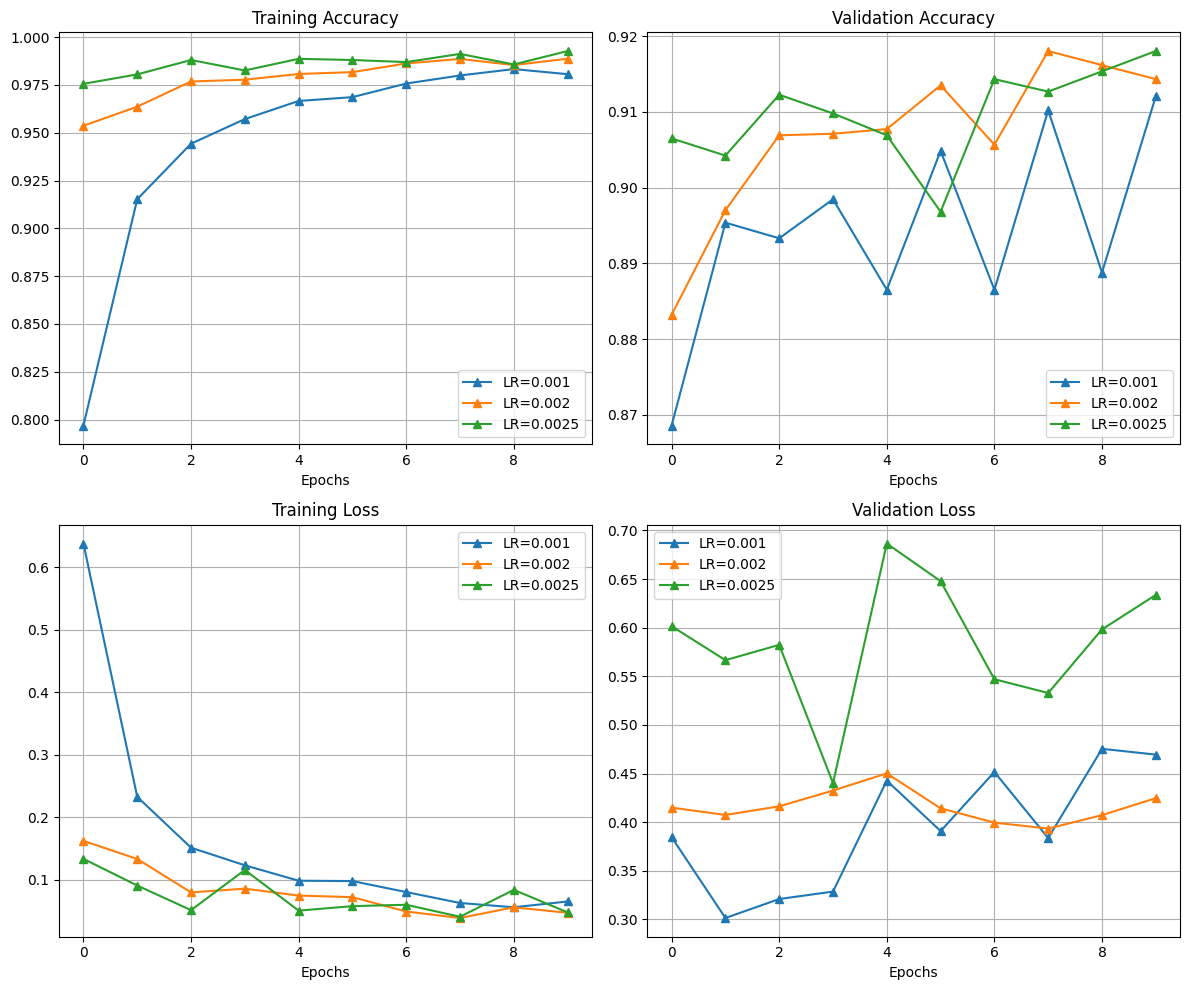

In [24]:


# Define learning rates
learning_rates = [0.001, 0.002, 0.0025]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

# Loop over different learning rates
for i, lr in enumerate(learning_rates):
    # Get the corresponding history
    history = locals()[f'history{i}']

    # Plot training accuracy
    axes[0].plot(history.history['accuracy'], label=f'LR={lr}', marker='^')

    # Plot validation accuracy
    axes[1].plot(history.history['val_accuracy'], label=f'LR={lr}', marker='^')

    # Plot training loss
    axes[2].plot(history.history['loss'], label=f'LR={lr}', marker='^')

    # Plot validation loss
    axes[3].plot(history.history['val_loss'], label=f'LR={lr}', marker='^')

# Set plot titles and labels
titles = ['Training Accuracy', 'Validation Accuracy', 'Training Loss', 'Validation Loss']
for i, ax in enumerate(axes):
    ax.set_title(titles[i])
    ax.set_xlabel('Epochs')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()
